In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('final_wo.csv')

# plot the distribution

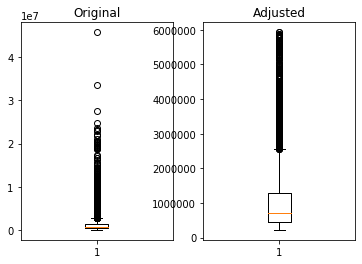

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

pd_series = data['price_T']
pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))] 

ax1.boxplot(pd_series)
ax1.set_title('Original')

ax2.boxplot(pd_series_adjusted)
ax2.set_title('Adjusted')

plt.show()

In [4]:
sns.set(rc={'figure.figsize':(10,6)})


 mu = 1528756.94 and sigma = 2602758.26



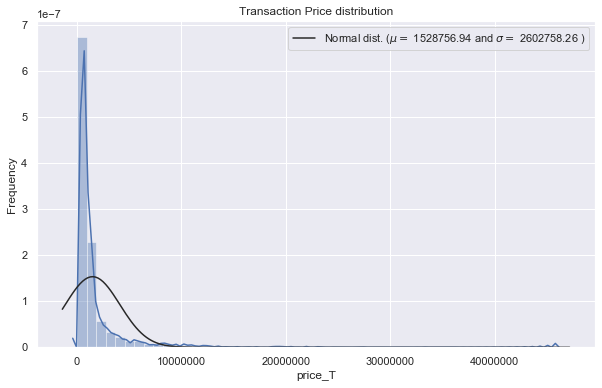

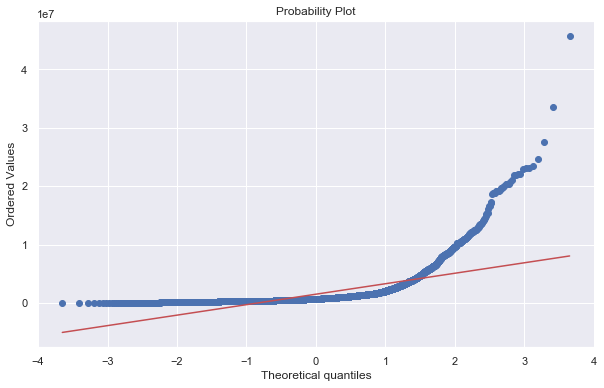

In [5]:
sns.distplot(data['price_T'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['price_T'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Transaction Price distribution')
plt.ticklabel_format(style='plain', axis='x')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['price_T'], plot=plt)

plt.ticklabel_format(style='plain', axis='x')
plt.show()

# drop outlier

In [6]:
data.shape

(5297, 47)

In [8]:
#data.sort_values('price_T',ascending=False).head()

In [9]:
len(data)*(0.05)

264.85

In [10]:
data = data.sort_values('price_T',ascending=False).iloc[265:]

In [11]:
data.shape

(5032, 47)

In [204]:
data['price_T'].describe()

count    5.297000e+03
mean     1.528757e+06
std      2.603004e+06
min      4.046412e+04
25%      4.226483e+05
50%      7.126962e+05
75%      1.389477e+06
max      4.574609e+07
Name: price_T, dtype: float64

# split dataset

In [17]:
data2=data.drop(['Accepted Year', 'NYXRCSA'], axis=1)

In [18]:
data2['Doorman']=data2['Doorman'].fillna(0)
data2['Pets']=data2['Pets'].fillna(0)

In [19]:
data2=data2.drop(['storage', 'common commercial ','administration'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2.drop(['Closing Price','price_T','price_T/sq_ft', 'Price_ft2',
                                                               'type','Neighborhood',], axis=1),
                                                   data2['price_T'],
                                                   test_size=0.2,
                                                   random_state=42)
X_train.shape, X_test.shape

((4025, 36), (1007, 36))

In [21]:
from sklearn.pipeline import Pipeline
from feature_engine import categorical_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from feature_engine import missing_data_imputers as mdi

In [22]:
miss_col=['common interest','Offering Price','monthli tax','monthli charg common','monthly carrying charges',
'common residential units','payroll','gas/ hot water/heat','electricity','water sewer','services supplies',
'insurance','management','legal and audit','contingency','beds2','baths2']

In [23]:
data_pipeline = Pipeline([
    #imput missing data
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=miss_col)),
    # feature Scaling
    ('scale', MinMaxScaler()) 
])

In [24]:
data_pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer_num',
                 MeanMedianImputer(variables=['common interest',
                                              'Offering Price', 'monthli tax',
                                              'monthli charg common',
                                              'monthly carrying charges',
                                              'common residential units',
                                              'payroll', 'gas/ hot water/heat',
                                              'electricity', 'water sewer',
                                              'services supplies', 'insurance',
                                              'management', 'legal and audit',
                                              'contingency', 'beds2',
                                              'baths2'])),
                ('scale', MinMaxScaler())])

In [25]:
X_train=data_pipeline.transform(X_train)
X_test=data_pipeline.transform(X_test)

# Keras

In [27]:
X_train.shape

(4025, 36)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [29]:
model = Sequential()

model.add(Dense(36,activation='relu'))
model.add(Dense(36,activation='relu'))
model.add(Dense(36,activation='relu'))
model.add(Dense(36,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [34]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400,
         callbacks=[early_stop])

Train on 4025 samples, validate on 1007 samples
Epoch 1/400
4025/4025 [==============================] - 2s 509us/sample - loss: 2081416223919.2883 - val_loss: 2366461855404.3613
Epoch 2/400
4025/4025 [==============================] - 0s 50us/sample - loss: 2081391558546.0947 - val_loss: 2366379857698.3198
Epoch 3/400
4025/4025 [==============================] - 0s 44us/sample - loss: 2081111670849.1289 - val_loss: 2365618430643.4795
Epoch 4/400
4025/4025 [==============================] - 0s 47us/sample - loss: 2079325517372.6768 - val_loss: 2361579269814.5303
Epoch 5/400
4025/4025 [==============================] - 0s 41us/sample - loss: 2071734673515.8699 - val_loss: 2346723517270.1807
Epoch 6/400
4025/4025 [==============================] - 0s 42us/sample - loss: 2048121489838.9705 - val_loss: 2305348384521.9146
Epoch 7/400
4025/4025 [==============================] - 0s 40us/sample - loss: 1988574187331.7366 - val_loss: 2210900019559.9761
Epoch 8/400
4025/4025 [==================

Epoch 64/400
4025/4025 [==============================] - 0s 40us/sample - loss: 177961403259.4524 - val_loss: 191122145426.4310
Epoch 65/400
4025/4025 [==============================] - 0s 45us/sample - loss: 176740804176.0119 - val_loss: 188967417805.1559
Epoch 66/400
4025/4025 [==============================] - 0s 43us/sample - loss: 175737550453.6646 - val_loss: 187810382247.0228
Epoch 67/400
4025/4025 [==============================] - 0s 38us/sample - loss: 174867927995.5637 - val_loss: 187559902808.9772
Epoch 68/400
4025/4025 [==============================] - 0s 41us/sample - loss: 173695623113.0475 - val_loss: 186657374240.5402
Epoch 69/400
4025/4025 [==============================] - 0s 42us/sample - loss: 172687484217.1786 - val_loss: 184917926969.9622
Epoch 70/400
4025/4025 [==============================] - 0s 42us/sample - loss: 172022636069.7799 - val_loss: 183990950219.5035
Epoch 71/400
4025/4025 [==============================] - 0s 43us/sample - loss: 171144498203.730

4025/4025 [==============================] - 0s 39us/sample - loss: 146770016466.1426 - val_loss: 157620140029.9662
Epoch 128/400
4025/4025 [==============================] - 0s 39us/sample - loss: 146422909546.2162 - val_loss: 157803607964.3456
Epoch 129/400
4025/4025 [==============================] - 0s 43us/sample - loss: 146141482418.7866 - val_loss: 157353559887.0626
Epoch 130/400
4025/4025 [==============================] - 0s 42us/sample - loss: 145893823838.8313 - val_loss: 157185536532.8461
Epoch 131/400
4025/4025 [==============================] - 0s 43us/sample - loss: 145498259569.9756 - val_loss: 156561788069.7517
Epoch 132/400
4025/4025 [==============================] - 0s 47us/sample - loss: 145378151966.6564 - val_loss: 156423498795.7259
Epoch 133/400
4025/4025 [==============================] - 0s 54us/sample - loss: 144859645249.3198 - val_loss: 156093226170.0894
Epoch 134/400
4025/4025 [==============================] - 0s 39us/sample - loss: 144576178085.9389 - va

4025/4025 [==============================] - 0s 42us/sample - loss: 131183729562.4904 - val_loss: 142648743291.2969
Epoch 191/400
4025/4025 [==============================] - 0s 41us/sample - loss: 130903589328.0437 - val_loss: 142673714158.7130
Epoch 192/400
4025/4025 [==============================] - 0s 39us/sample - loss: 130802616494.5252 - val_loss: 142979753595.5511
Epoch 193/400
4025/4025 [==============================] - 0s 41us/sample - loss: 130556033814.1973 - val_loss: 142216105719.6107
Epoch 194/400
4025/4025 [==============================] - 0s 41us/sample - loss: 130496561831.7833 - val_loss: 143009071665.3188
Epoch 195/400
4025/4025 [==============================] - 0s 42us/sample - loss: 130063527643.9374 - val_loss: 141795311697.3506
Epoch 196/400
4025/4025 [==============================] - 0s 43us/sample - loss: 130283370199.3580 - val_loss: 141710449459.6068
Epoch 197/400
4025/4025 [==============================] - 0s 38us/sample - loss: 129805639430.6783 - va

Epoch 253/400
4025/4025 [==============================] - 0s 36us/sample - loss: 121730647733.7759 - val_loss: 134326685260.7746
Epoch 254/400
4025/4025 [==============================] - 0s 39us/sample - loss: 121248545358.7399 - val_loss: 133644795123.0348
Epoch 255/400
4025/4025 [==============================] - 0s 36us/sample - loss: 121322031811.7684 - val_loss: 133516141764.2582
Epoch 256/400
4025/4025 [==============================] - 0s 41us/sample - loss: 121567948316.6211 - val_loss: 133767954911.9682
Epoch 257/400
4025/4025 [==============================] - 0s 48us/sample - loss: 121404176791.5647 - val_loss: 133403917546.8997
Epoch 258/400
4025/4025 [==============================] - 0s 41us/sample - loss: 120690636260.1421 - val_loss: 133829714082.7011
Epoch 259/400
4025/4025 [==============================] - 0s 49us/sample - loss: 120689816729.4092 - val_loss: 133382033704.9295
Epoch 260/400
4025/4025 [==============================] - 0s 43us/sample - loss: 12058660

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1332      
_________________________________________________________________
dense_1 (Dense)              multiple                  1332      
_________________________________________________________________
dense_2 (Dense)              multiple                  1332      
_________________________________________________________________
dense_3 (Dense)              multiple                  1332      
_________________________________________________________________
dense_4 (Dense)              multiple                  37        
Total params: 5,365
Trainable params: 5,365
Non-trainable params: 0
_________________________________________________________________


In [36]:
losses = pd.DataFrame(model.history.history)

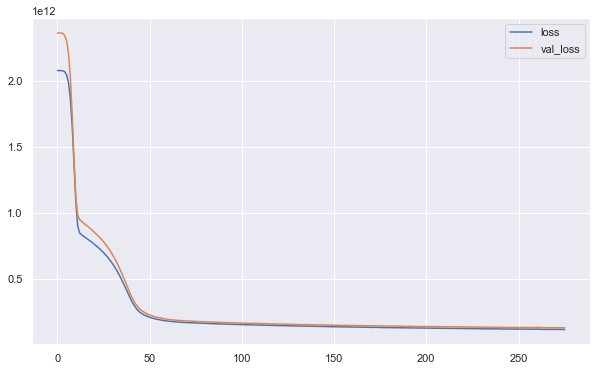

In [37]:
losses.plot()

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [39]:
predictions = model.predict(X_test)

In [40]:
np.sqrt(mean_squared_error(y_test,predictions))

363356.4592937001

In [41]:
explained_variance_score(y_test,predictions)

0.8866657381206984

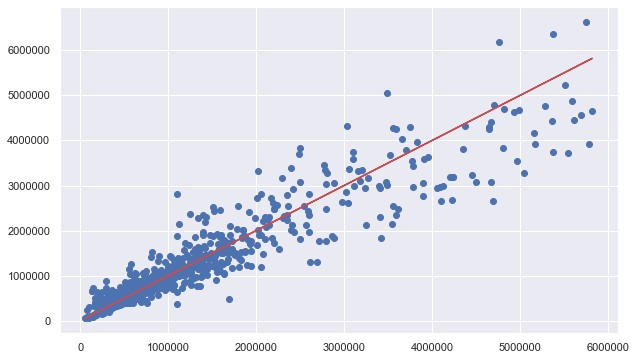

In [42]:
# predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [44]:
errors = y_test.values.reshape(1007, 1) - predictions

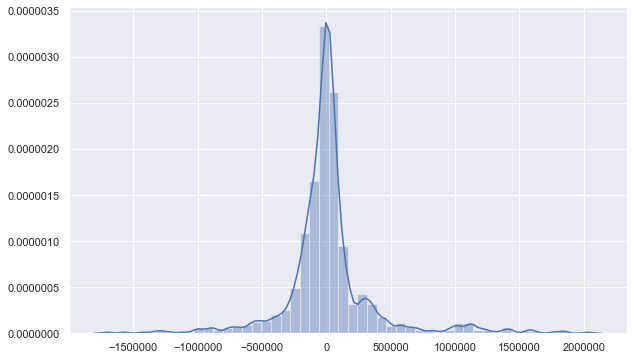

In [45]:
sns.distplot(errors)